[Zurück zum Hypothesentest](Hypothesentest.ipynb)

# Fehler 2. Art

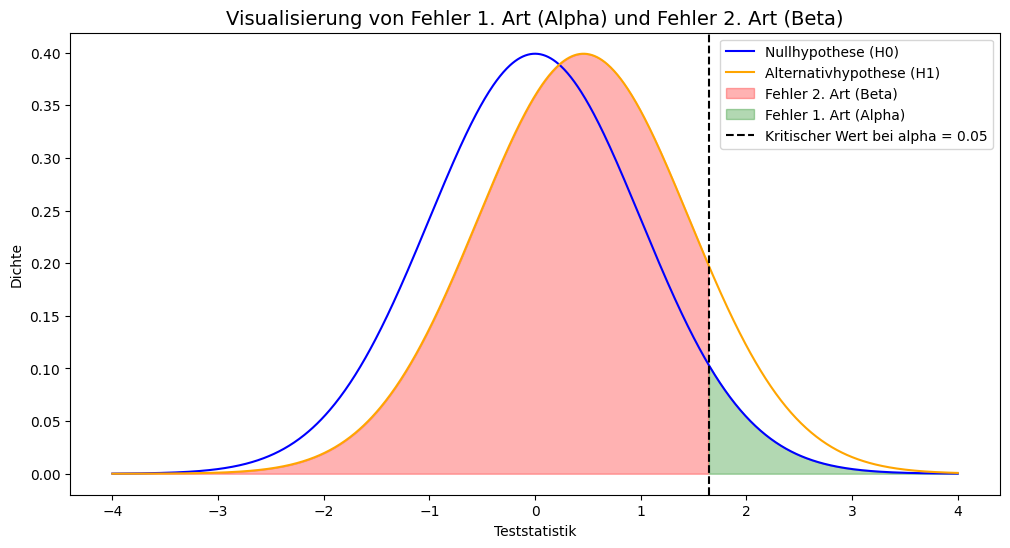

Effektgröße (Cohen's d): 0.4586824722938628
Teststärke (Power): 0.25470873215043643
Fehler 2. Art (Beta): 0.7452912678495636


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.stats.power import TTestPower

# Beispieldaten: Stichprobe
stichprobe = [22, 24, 25, 23, 26, 27, 28, 30, 22, 25]

# Berechnung des Mittelwerts und Standardabweichung
mittelwert = np.mean(stichprobe)
popmean = 24
std = np.std(stichprobe, ddof=1)

# Effektgröße (Cohen's d)
effektgroesse = (mittelwert - popmean) / std

# Berechnung der Teststärke und Fehler 2. Art
power_analysis = TTestPower()
sample_size = len(stichprobe)
alpha = 0.05
power = power_analysis.solve_power(effect_size=effektgroesse, nobs=sample_size, alpha=alpha)
beta = 1 - power

# Visualisierung
x = np.linspace(-4, 4, 1000)

# Nullhypothese (H0): t-Verteilung um 0
null_dist = stats.norm(loc=0, scale=1).pdf(x)

# Alternativhypothese (H1): t-Verteilung um Effektgröße
alt_dist = stats.norm(loc=effektgroesse, scale=1).pdf(x)

plt.figure(figsize=(12, 6))

# Plot der Nullhypothese
plt.plot(x, null_dist, label='Nullhypothese (H0)', color='blue')

# Plot der Alternativhypothese
plt.plot(x, alt_dist, label='Alternativhypothese (H1)', color='orange')

# Kritischer Wert bei Signifikanzniveau alpha
t_critical = stats.norm.ppf(1 - alpha)

# Markiere den Fehler 2. Art (Beta-Bereich)
plt.fill_between(x, 0, alt_dist, where=(x < t_critical), color='red', alpha=0.3, label='Fehler 2. Art (Beta)')

# Markiere den Fehler 1. Art (Alpha-Bereich)
plt.fill_between(x, 0, null_dist, where=(x > t_critical), color='green', alpha=0.3, label='Fehler 1. Art (Alpha)')

# Markiere den kritischen t-Wert
plt.axvline(t_critical, color='black', linestyle='--', label=f'Kritischer Wert bei alpha = {alpha}')

# Titel und Legende
plt.title('Visualisierung von Fehler 1. Art (Alpha) und Fehler 2. Art (Beta)', fontsize=14)
plt.xlabel('Teststatistik')
plt.ylabel('Dichte')
plt.legend()

plt.show()

# Ergebnisse drucken
print(f"Effektgröße (Cohen's d): {effektgroesse}")
print(f'Teststärke (Power): {power}')
print(f'Fehler 2. Art (Beta): {beta}')